# Creating a Custom Dataset for training YOLOv8

In [134]:
import yaml
import numpy as np
import pandas as pd
import os
import cv2

### Get File Names of geom.yml and types.yml annotation files from train and validate folders
* `diva_train_path`
    - `train_files`
* `diva_valid_path`
    - `valid_files`

### Some Data Cleaning:
#### some files in the 'annotations' don't actually correspond to a VIRAT_Ground_Dataset .mp4 file

In [135]:
# get diva annotation files from training folder
diva_train_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/diva_annotations/train'
train_dir = os.listdir(diva_train_path)
keep_these = {".geom", "types"}
train_geom_types = sorted([item for item in train_dir if item[-9:-4] in keep_these])
train_files = list(zip(train_geom_types[::2], train_geom_types[1::2]))
train_files

[('VIRAT_S_000000.geom.yml', 'VIRAT_S_000000.types.yml'),
 ('VIRAT_S_000001.geom.yml', 'VIRAT_S_000001.types.yml'),
 ('VIRAT_S_000002.geom.yml', 'VIRAT_S_000002.types.yml'),
 ('VIRAT_S_000005.geom.yml', 'VIRAT_S_000005.types.yml'),
 ('VIRAT_S_000200_03_000657_000899.geom.yml',
  'VIRAT_S_000200_03_000657_000899.types.yml'),
 ('VIRAT_S_000200_05_001525_001575.geom.yml',
  'VIRAT_S_000200_05_001525_001575.types.yml'),
 ('VIRAT_S_000201_03_000640_000672.geom.yml',
  'VIRAT_S_000201_03_000640_000672.types.yml'),
 ('VIRAT_S_000201_05_001081_001215.geom.yml',
  'VIRAT_S_000201_05_001081_001215.types.yml'),
 ('VIRAT_S_000201_06_001354_001397.geom.yml',
  'VIRAT_S_000201_06_001354_001397.types.yml'),
 ('VIRAT_S_000201_07_001485_001581.geom.yml',
  'VIRAT_S_000201_07_001485_001581.types.yml'),
 ('VIRAT_S_000201_08_001652_001838.geom.yml',
  'VIRAT_S_000201_08_001652_001838.types.yml'),
 ('VIRAT_S_000202_02_001527_001560.geom.yml',
  'VIRAT_S_000202_02_001527_001560.types.yml'),
 ('VIRAT_S_00020

In [136]:
annotations_list = [item[0].split('.')[0] for item in train_files]
videos_list_ = sorted(os.listdir('/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original'))
videos_list = [item.split('.')[0] for item in videos_list_]

In [137]:
len(annotations_list)

64

In [138]:
len(videos_list)

329

In [139]:
dont_exist = []
for i in range(len(annotations_list)):
    if annotations_list[i] not in videos_list:
        dont_exist.append(annotations_list[i])
dont_exist

['VIRAT_S_000000',
 'VIRAT_S_000005',
 'VIRAT_S_000202_02_001527_001560',
 'VIRAT_S_000202_03_001577_001611',
 'VIRAT_S_000202_04_001704_001746',
 'VIRAT_S_000204_00_000000_000109',
 'VIRAT_S_000204_03_000667_000703',
 'VIRAT_S_000204_04_000738_000977',
 'VIRAT_S_000204_05_001334_001520',
 'VIRAT_S_000205_07_001761_001804',
 'VIRAT_S_000206_03_000500_000556',
 'VIRAT_S_000206_04_000710_000779',
 'VIRAT_S_040100_01_000347_000432',
 'VIRAT_S_040101_02_000224_000440',
 'VIRAT_S_040101_03_000460_000551',
 'VIRAT_S_040101_04_000562_000679',
 'VIRAT_S_040102_08_000986_001090',
 'VIRAT_S_040102_10_001258_001408',
 'VIRAT_S_040102_13_001557_001589']

In [140]:
remove_these = [(item+'.geom.yml', item+'.types.yml') for item in dont_exist]

In [141]:
len(train_files)

64

In [142]:
for i in range(len(remove_these)):
    train_files.remove(remove_these[i])

In [143]:
len(train_files)

45

In [144]:
# get diva annotation files from validation folder
diva_validate_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/diva_annotations/validate'
valid_dir = os.listdir(diva_validate_path)
keep_these = {".geom", "types"}
valid_geom_types = sorted([item for item in valid_dir if item[-9:-4] in keep_these])
valid_files = list(zip(valid_geom_types[::2], valid_geom_types[1::2]))
valid_files

[('VIRAT_S_000007.geom.yml', 'VIRAT_S_000007.types.yml'),
 ('VIRAT_S_000008.geom.yml', 'VIRAT_S_000008.types.yml'),
 ('VIRAT_S_000200_00_000100_000171.geom.yml',
  'VIRAT_S_000200_00_000100_000171.types.yml'),
 ('VIRAT_S_000200_02_000479_000635.geom.yml',
  'VIRAT_S_000200_02_000479_000635.types.yml'),
 ('VIRAT_S_000201_00_000018_000380.geom.yml',
  'VIRAT_S_000201_00_000018_000380.types.yml'),
 ('VIRAT_S_000201_01_000384_000589.geom.yml',
  'VIRAT_S_000201_01_000384_000589.types.yml'),
 ('VIRAT_S_000201_02_000590_000623.geom.yml',
  'VIRAT_S_000201_02_000590_000623.types.yml'),
 ('VIRAT_S_000201_04_000682_000822.geom.yml',
  'VIRAT_S_000201_04_000682_000822.types.yml'),
 ('VIRAT_S_000203_01_000171_000345.geom.yml',
  'VIRAT_S_000203_01_000171_000345.types.yml'),
 ('VIRAT_S_000203_08_001702_001734.geom.yml',
  'VIRAT_S_000203_08_001702_001734.types.yml'),
 ('VIRAT_S_000204_07_001577_001611.geom.yml',
  'VIRAT_S_000204_07_001577_001611.types.yml'),
 ('VIRAT_S_000204_09_001768_001849.geo

In [145]:
annotations_list = [item[0].split('.')[0] for item in valid_files]
videos_list_ = sorted(os.listdir('/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original'))
videos_list = [item.split('.')[0] for item in videos_list_]

In [146]:
dont_exist = []
for i in range(len(annotations_list)):
    if annotations_list[i] not in videos_list:
        dont_exist.append(annotations_list[i])
dont_exist

['VIRAT_S_000007',
 'VIRAT_S_000008',
 'VIRAT_S_000203_01_000171_000345',
 'VIRAT_S_000204_07_001577_001611',
 'VIRAT_S_000204_09_001768_001849',
 'VIRAT_S_000205_06_001566_001631',
 'VIRAT_S_000206_00_000025_000058',
 'VIRAT_S_000206_01_000148_000184',
 'VIRAT_S_000206_02_000294_000327',
 'VIRAT_S_040100_03_000496_000559',
 'VIRAT_S_040100_04_000626_000689',
 'VIRAT_S_040100_05_000696_000762',
 'VIRAT_S_040100_06_000767_000988',
 'VIRAT_S_040100_07_001043_001099',
 'VIRAT_S_040100_08_001103_001181',
 'VIRAT_S_040100_09_001186_001533',
 'VIRAT_S_040101_05_000722_001547',
 'VIRAT_S_040101_06_001557_001590',
 'VIRAT_S_040102_04_000596_000689',
 'VIRAT_S_040102_06_000849_000908',
 'VIRAT_S_040102_07_000916_000983']

In [147]:
len(valid_files)

55

In [148]:
remove_these = [(item+'.geom.yml', item+'.types.yml') for item in dont_exist]

In [149]:
for i in range(len(remove_these)):
    valid_files.remove(remove_these[i])

In [150]:
len(valid_files)

34

### Take a sample of the Train and Validate files for data extraction
- 30 from Train
- 10 from Validate

In [151]:
import random
random.seed(40)

train_sample = sorted(random.sample(train_files, 30))
valid_sample = sorted(random.sample(valid_files, 10))

In [152]:
len(train_sample)

30

In [153]:
len(valid_sample)

10

### Match Annotation Files to Video Files
* `train_sample` <--> `train_files`
* `valid_sample` <--> `valid_files`

In [154]:
train_files = []

for i in range(len(train_sample)):
    this_file = train_sample[i][0].split('.')[0]
    this_file += '.mp4'
    train_files.append((train_sample[i][0], train_sample[i][1], this_file))
len(train_files)

30

In [155]:
for i in range(3):
    print(train_files[27][i])

VIRAT_S_040104_06_001121_001241.geom.yml
VIRAT_S_040104_06_001121_001241.types.yml
VIRAT_S_040104_06_001121_001241.mp4


In [156]:
valid_files = []

for i in range(len(valid_sample)):
    this_file = valid_sample[i][0].split('.')[0]
    this_file += '.mp4'
    valid_files.append((valid_sample[i][0], valid_sample[i][1], this_file))
len(valid_files)

10

In [157]:
for i in range(3):
    print(valid_files[7][i])

VIRAT_S_040103_00_000000_000120.geom.yml
VIRAT_S_040103_00_000000_000120.types.yml
VIRAT_S_040103_00_000000_000120.mp4


### Get 200 images of 'Persons' with ground truth from each video.
#### Training

1. Import geom.yml and types.yml files
2. get dataframe from (1)
3. Filter for 'Persons' and create sample of frames
4. Write frames as .jpgs in Custom_Dataset/train/images/ folder with '[file-prefix]_[frame-num].jpg' as file name
5. Write .txt files by Querying full dataframe per frame for detections' labels and bboxes. write to Custom_Dataset/train/labels/ folder with '[file-prefix]_[frame-num].txt' as file name
6. Repeat 1-5 for Validation Set

In [158]:
diva_train_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/diva_annotations/train'

def get_geom_types(files_pos):
    '''
    Reads .yml files into python dictionaries...
    takes a while...
    '''
    
    # geom
    geom_path = diva_train_path + '/' + train_files[files_pos][0]
    with open(geom_path, 'r') as file:
        geom = yaml.safe_load(file)

    # types
    types_path = diva_train_path + '/' + train_files[files_pos][1]
    with open(types_path, 'r') as file:
        types = yaml.safe_load(file)
    
    return geom, types

In [180]:
# alt for VALID
diva_train_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/diva_annotations/validate'

def get_geom_types_v(files_pos):
    '''
    Reads .yml files into python dictionaries...
    takes a while...
    '''
    
    # geom
    geom_path = diva_train_path + '/' + valid_files[files_pos][0]
    with open(geom_path, 'r') as file:
        geom = yaml.safe_load(file)

    # types
    types_path = diva_train_path + '/' + valid_files[files_pos][1]
    with open(types_path, 'r') as file:
        types = yaml.safe_load(file)
    
    return geom, types

In [159]:
# Turns the geom.yml and types.yml files into a single dataframe

def get_df(geom, types):
    '''
    returns a dataframe from the geom and types dictionaries
    '''
    id0 = []  # unique detection index
    id1 = []  # track_id
    ts0 = []  # frame
    labels = []  # string class labels
    labels_ints = []  # integer class labels
    confs = []
    xmin, ymin, xmax, ymax = [], [], [], []

    for i in geom:
      try:
        if i['geom']['ts0'] is not None:  # populates detections data from geom file
          id0.append(i['geom']['id0'])
          id1.append(i['geom']['id1'])
          ts0.append(i['geom']['ts0'])
          bb = i['geom']['g0'].split(' ')
          xmin.append(int(bb[0]))
          ymin.append(int(bb[1]))
          xmax.append(int(bb[2]))
          ymax.append(int(bb[3]))

          for j in types:
            try:
              if j['types']['id1'] == id1[-1]:  # pulls labels and confidences (by track id --> 'id1') from types.yaml file
                label, conf = next(iter(j['types']['cset3'].items()))
                confs.append(conf)
                labels.append(label)
                # also save labels as ints for comparison with YOLOv8 Predictions later on
                if label == 'Person':
                  labels_ints.append(0)
                elif label == 'Bike':
                  labels_ints.append(1)
                elif label == 'Vehicle':
                  labels_ints.append(2)
                else:
                  labels_ints.append(-1)
            except:
              pass
      except:
        pass

    gt = {'idx_gt': id0, 'track_id_gt': id1, 'label_gt': labels,
          'label_as_int_gt': labels_ints, 'conf_gt': confs, 'frame_gt': ts0,
          'xmin_gt': xmin, 'ymin_gt': ymin, 'xmax_gt': xmax, 'ymax_gt': ymax}
    df = pd.DataFrame(gt)
    
    print('df is created!')
    return df

In [181]:
# alt for VALID
# Turns the geom.yml and types.yml files into a single dataframe

def get_df_v(geom, types):
    '''
    returns a dataframe from the geom and types dictionaries
    '''
    id0 = []  # unique detection index
    id1 = []  # track_id
    ts0 = []  # frame
    labels = []  # string class labels
    labels_ints = []  # integer class labels
    confs = []
    xmin, ymin, xmax, ymax = [], [], [], []

    for i in geom:
      try:
        if i['geom']['ts0'] is not None:  # populates detections data from geom file
          id0.append(i['geom']['id0'])
          id1.append(i['geom']['id1'])
          ts0.append(i['geom']['ts0'])
          bb = i['geom']['g0'].split(' ')
          xmin.append(int(bb[0]))
          ymin.append(int(bb[1]))
          xmax.append(int(bb[2]))
          ymax.append(int(bb[3]))

          for j in types:
            try:
              if j['types']['id1'] == id1[-1]:  # pulls labels and confidences (by track id --> 'id1') from types.yaml file
                label, conf = next(iter(j['types']['cset3'].items()))
                confs.append(conf)
                labels.append(label)
                # also save labels as ints for comparison with YOLOv8 Predictions later on
                if label == 'Person':
                  labels_ints.append(0)
                elif label == 'Bike':
                  labels_ints.append(1)
                elif label == 'Vehicle':
                  labels_ints.append(2)
                else:
                  labels_ints.append(-1)
            except:
              pass
      except:
        pass

    gt = {'idx_gt': id0, 'track_id_gt': id1, 'label_gt': labels,
          'label_as_int_gt': labels_ints, 'conf_gt': confs, 'frame_gt': ts0,
          'xmin_gt': xmin, 'ymin_gt': ymin, 'xmax_gt': xmax, 'ymax_gt': ymax}
    df = pd.DataFrame(gt)
    
    print('df is created!')
    return df

In [160]:
# sample and filter the df
def filter_and_sample(df):
    '''filters and samples from a dataframe
    
    returns: list of frame numbers
    '''
    # filter for cars and people
    df_persons = df[df['label_as_int_gt'] == 0]
    # sample of the df
    df_persons_200 = df_persons.sample(n=min(len(df_persons), 200))
    persons_frames = sorted(df_persons_200['frame_gt'].to_list())
    print('len(persons_frames): ', len(persons_frames))
    
    return persons_frames

In [182]:
# alt for VALID
# sample and filter the df
def filter_and_sample_v(df):
    '''filters and samples from a dataframe
    
    returns: list of frame numbers
    '''
    # filter for cars and people
    df_persons = df[df['label_as_int_gt'] == 0]
    # sample of the df
    df_persons_200 = df_persons.sample(n=min(len(df_persons), 200))
    persons_frames = sorted(df_persons_200['frame_gt'].to_list())
    print('len(persons_frames): ', len(persons_frames))
    
    return persons_frames

In [183]:
def convert_bbox_format(bbox, total_width, total_height):
    """
    Converts bounding box from [xmin, ymin, xmax, ymax] format to 
    normalized [x_mid, y_mid, width, height] format.

    Parameters:
    bbox (list): A list of 4 floats: [xmin, ymin, xmax, ymax].
    total_width (int): The total width of the encoded frame.
    total_height (int): The total height of the encoded frame.

    Returns:
    list: A list of 4 floats: [x_mid, y_mid, width, height] where these values 
    have been normalized with respect to total_width and total_height.
    """
    xmin, ymin, xmax, ymax = bbox
    width = xmax - xmin
    height = ymax - ymin
    x_mid = xmin + width / 2
    y_mid = ymin + height / 2
    
    # Normalize the coordinates and dimensions
    x_mid /= total_width
    y_mid /= total_height
    width /= total_width
    height /= total_height
    
    return [x_mid, y_mid, width, height]

In [164]:
def write_files(files_pos, persons_frames, df):

    # write .jpgs and .txts for all frames of train_files[files_pos][3]
    # to '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/[images, labels]'
    vid_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original/'
    this_vid_path = vid_path + train_files[files_pos][2]

    # begin video capture
    cap = cv2.VideoCapture(this_vid_path)

    total_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    total_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    for i in persons_frames:
        # write .txt files:
        # get persons in frame
        persons_in_frame_df = df[(df['frame_gt'] == i) & (df['label_as_int_gt'] == 0)]

        write_this = ""
        for j in range(len(persons_in_frame_df)):
            this_person = persons_in_frame_df.iloc[j]
            label = this_person['label_as_int_gt']
            xmin = float(this_person['xmin_gt'])
            ymin = float(this_person['ymin_gt'])
            xmax = float(this_person['xmax_gt'])
            ymax = float(this_person['ymax_gt'])
            x_mid, y_mid, width, height = convert_bbox_format([xmin,ymin,xmax,ymax], total_width, total_height)

            # create string for .txt file
            write_this += str(label) + ' ' + str(x_mid) + ' ' + str(y_mid) + ' ' + str(width) + ' ' + str(height)
            if j != (len(persons_in_frame_df) - 1):
                write_this += '\n'

        # write the .txt file
        labels_loc = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/labels/'
        txt_path = labels_loc + train_files[files_pos][2].split('.')[0] + '_' + str(i) + '.txt'
        with open(txt_path, 'w') as f:
            f.write(write_this)

        # write .jpg files:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)  # set frame position
        success, frame = cap.read()  # read frame
        if not success:
            print("Failed to read the frame")
        if success:
            images_loc = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/images/'
            filepath = images_loc + train_files[files_pos][2].split('.')[0] + '_' + str(i) + '.jpg'
            cv2.imwrite(filepath, frame)  # write frame to .jpg and store in parent folder

    # end capture
    cap.release()

In [189]:
# alt for VALID
def write_files_v(files_pos, persons_frames, df):

    # write .jpgs and .txts for all frames of valid_files[files_pos][3]
    # to '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/[images, labels]'
    vid_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original/'
    this_vid_path = vid_path + valid_files[files_pos][2]

    # begin video capture
    cap = cv2.VideoCapture(this_vid_path)

    total_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    total_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    for i in persons_frames:
        # write .txt files:
        # get persons in frame
        persons_in_frame_df = df[(df['frame_gt'] == i) & (df['label_as_int_gt'] == 0)]

        write_this = ""
        for j in range(len(persons_in_frame_df)):
            this_person = persons_in_frame_df.iloc[j]
            label = this_person['label_as_int_gt']
            xmin = float(this_person['xmin_gt'])
            ymin = float(this_person['ymin_gt'])
            xmax = float(this_person['xmax_gt'])
            ymax = float(this_person['ymax_gt'])
            x_mid, y_mid, width, height = convert_bbox_format([xmin,ymin,xmax,ymax], total_width, total_height)

            # create string for .txt file
            write_this += str(label) + ' ' + str(x_mid) + ' ' + str(y_mid) + ' ' + str(width) + ' ' + str(height)
            if j != (len(persons_in_frame_df) - 1):
                write_this += '\n'

        # write the .txt file
        labels_loc = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/valid/labels/'
        txt_path = labels_loc + valid_files[files_pos][2].split('.')[0] + '_' + str(i) + '.txt'
        with open(txt_path, 'w') as f:
            f.write(write_this)

        # write .jpg files:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)  # set frame position
        success, frame = cap.read()  # read frame
        if not success:
            print("Failed to read the frame")
        if success:
            images_loc = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/valid/images/'
            filepath = images_loc + valid_files[files_pos][2].split('.')[0] + '_' + str(i) + '.jpg'
            cv2.imwrite(filepath, frame)  # write frame to .jpg and store in parent folder

    # end capture
    cap.release()

In [165]:
%%time
for files_pos in range(len(train_files)):
    geom, types = get_geom_types(files_pos)
    df = get_df(geom, types)
    persons_frames = filter_and_sample(df)
    write_files(files_pos, persons_frames, df)

df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  0
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  0
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(p

SOME OF MY VIDEOS HAVE NO PEOPLE?? idk... len(persons_frames) is 0 for i positions [15, 18] of train_files


In [169]:
# indeed, this video is 0:35 AND has no people in it
train_files[15]

('VIRAT_S_040000_05_000668_000703.geom.yml',
 'VIRAT_S_040000_05_000668_000703.types.yml',
 'VIRAT_S_040000_05_000668_000703.mp4')

In [170]:
train_files[18]

('VIRAT_S_040004_00_000011_000093.geom.yml',
 'VIRAT_S_040004_00_000011_000093.types.yml',
 'VIRAT_S_040004_00_000011_000093.mp4')

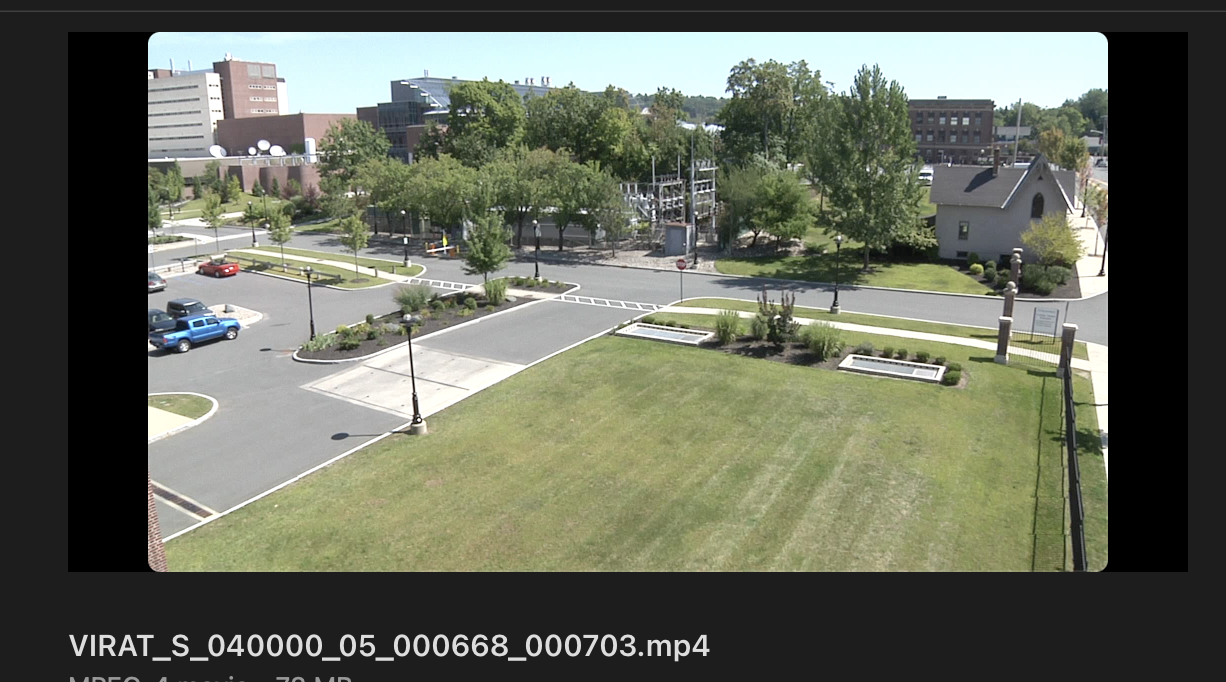

In [166]:
len(os.listdir('/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/labels'))

5416

In [167]:
len(os.listdir('/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/train/images'))

5415

In [168]:

# Load video
video = cv2.VideoCapture('/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original/VIRAT_S_000002.mp4')

# Get number of frames
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print('Number of frames:', num_frames)

# Release the VideoCapture object
video.release()

Number of frames: 9075


### DATA CLEANING:
- one of the .jpg files wasn't made
    * REMOVED IT'S CORRESPONDING .TXT file

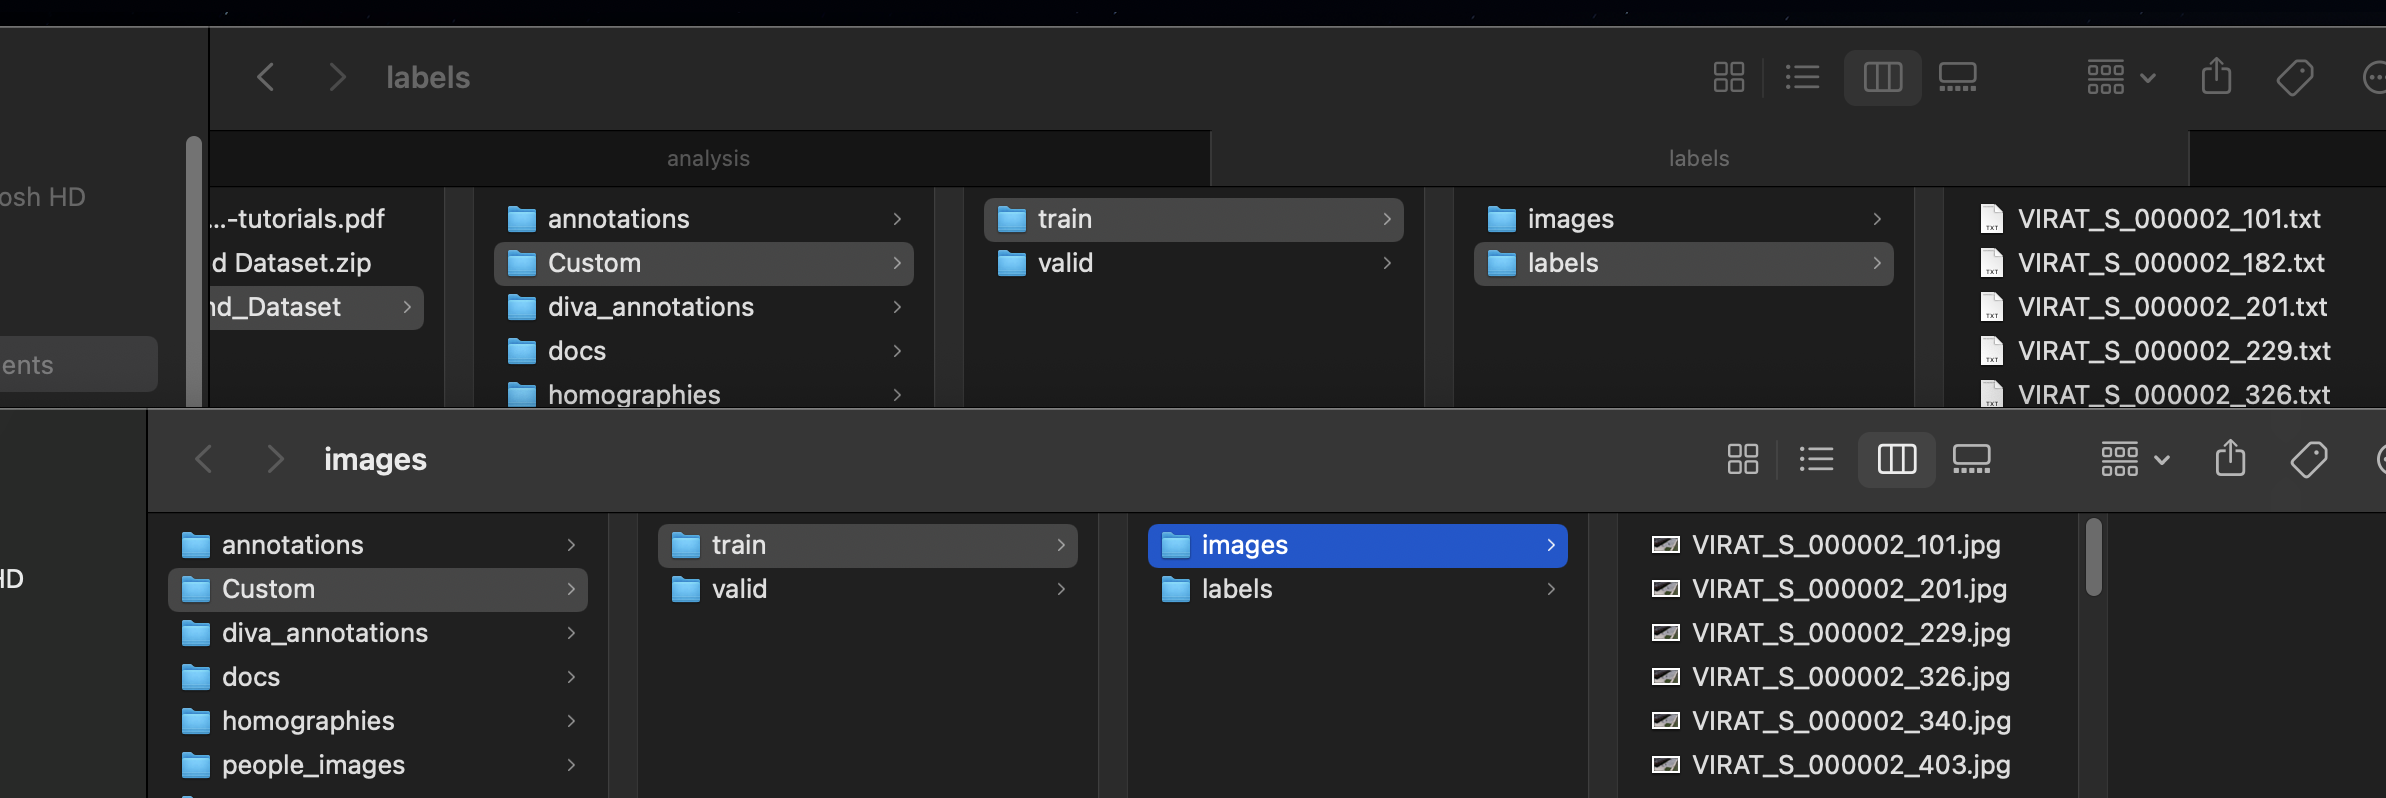

# MODEL TRAINING

In [171]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 7.1 MB/s eta 0:00:0000:0100:01
  Using cached opencv_python-4.7.0.72-cp37-abi3-macosx_11_0_arm64.whl (32.6 MB)
  Using cached torch-2.0.1-cp310-none-macosx_11_0_arm64.whl (55.8 MB)
  Using cached torchvision-0.15.2-cp310-cp310-macosx_11_0_arm64.whl (1.4 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached pandas-2.0.2-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached typing_extensions-4.6.3-py3-none-any.whl (31 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [172]:
!pip install lap

  Using cached lap-0.4.0-cp310-cp310-macosx_12_0_arm64.whl


In [174]:
from ultralytics import YOLO
import lap

model = YOLO('yolov8x.pt')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 131M/131M [01:06<00:00, 2.07MB/s]


In [175]:
!pwd

/Users/p/Documents/GitHub/VIRAT/analysis


In [176]:
!ls

06_21_2023_Accuracy_Measurements.ipynb
06_23_2023_YOLOv8n_Single_Frame_IOU.ipynb
06_26_2023_YOLOv8n_300_Frames_IOU.ipynb
06_27_2023_YOLOv8x_300_Frames_IOU.ipynb
6-Survey_of_Research_and_SOTA.ipynb
7-Yolov8_ByteTrack_Demonstration_of_Inaccuracy.ipynb
7.2-Creating_Custom_Dataset.ipynb
7.3-Creating_Custom_Dataset.ipynb
Annotations_EDA_pre-diva.ipynb
EDA.04.17.py
EDA_04_25_23.ipynb
EDA_04_25_23_pre-diva.alt.ipynb
EDA_04_29_23.alt.ipynb
EDA_04_29_23.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
VIRAT_EDA-Peter_McMaster.ipynb
YOLOv3_performance_on_virat.ipynb
fxn_test.py
yolov8n.pt
yolov8x.pt


In [177]:
%%writefile custom.yaml
path: '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/'
train: 'train/images'
val: 'valid/images'
    
# class names
names:
    0: 'Person'

Writing custom.yaml


In [178]:
!ls

06_21_2023_Accuracy_Measurements.ipynb
06_23_2023_YOLOv8n_Single_Frame_IOU.ipynb
06_26_2023_YOLOv8n_300_Frames_IOU.ipynb
06_27_2023_YOLOv8x_300_Frames_IOU.ipynb
6-Survey_of_Research_and_SOTA.ipynb
7-Yolov8_ByteTrack_Demonstration_of_Inaccuracy.ipynb
7.2-Creating_Custom_Dataset.ipynb
7.3-Creating_Custom_Dataset.ipynb
Annotations_EDA_pre-diva.ipynb
EDA.04.17.py
EDA_04_25_23.ipynb
EDA_04_25_23_pre-diva.alt.ipynb
EDA_04_29_23.alt.ipynb
EDA_04_29_23.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
VIRAT_EDA-Peter_McMaster.ipynb
YOLOv3_performance_on_virat.ipynb
custom.yaml
fxn_test.py
yolov8n.pt
yolov8x.pt


In [179]:
# Train the model with 2 GPUs
model.train(data='custom.yaml', epochs=10, imgsz=1280, device='mps')

New https://pypi.org/project/ultralytics/8.0.124 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.120 🚀 Python-3.10.11 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=custom.yaml, epochs=10, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

FileNotFoundError: [34m[1mval: [0mError loading data from /Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/valid/images
See https://docs.ultralytics.com/yolov5/tutorials/train_custom_data

DARN I HAVE TO DO THE VALID DATA FIRST
- create `# alt for VALID` blocks
- run it (below)

In [192]:
%%time
# alt for VALID
for files_pos in range(len(valid_files)):
    geom, types = get_geom_types_v(files_pos)
    df = get_df_v(geom, types)
    persons_frames = filter_and_sample_v(df)
    write_files_v(files_pos, persons_frames, df)

df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
df is created!
len(persons_frames):  200
CPU times: user 6min 3s, sys: 15.1 s, total: 6min 18s
Wall time: 4min 37s


In [193]:
# Train the model with 2 GPUs
model.train(data='custom.yaml', epochs=10, imgsz=1280, device='mps')

New https://pypi.org/project/ultralytics/8.0.124 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.120 🚀 Python-3.10.11 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=custom.yaml, epochs=10, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

RuntimeError: MPS backend out of memory (MPS allocated: 45.93 GB, other allocations: 35.83 GB, max allowed: 81.60 GB). Tried to allocate 256 bytes on shared pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

I HAVE TO SOFTWARE UPDATE LOL

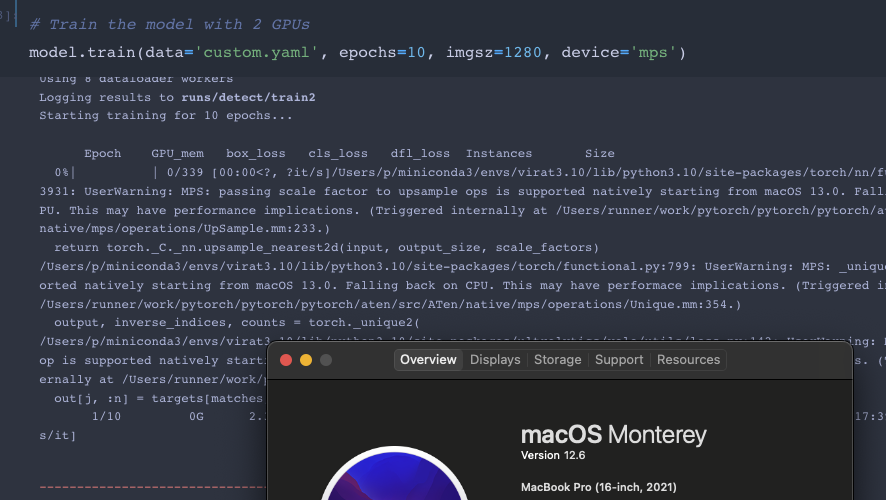

ALSO I RAN OUT OF MEMORY

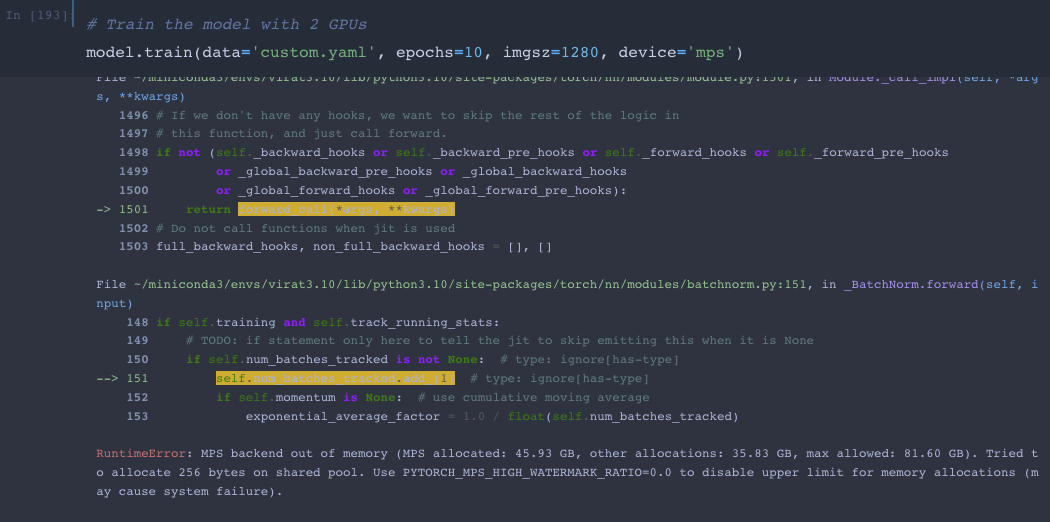